In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [23]:
import pandas as pd
import numpy as np

# 1. Load the raw data
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

y_values = raw_df.values[1::2, 2]

# 3. Define the original column names
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# 4. Create the DataFrame
dataset = pd.DataFrame(data, columns=columns)

# 5. Add the target variable (Price) to the DataFrame
dataset['MEDV'] = y_values
dataset['Price'] = target

# Preview the results
print(dataset.head())

print(dataset.info())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  Price  
0     15.3  396.90   4.98  24.0   24.0  
1     17.8  396.90   9.14  21.6   21.6  
2     17.8  392.83   4.03  34.7   34.7  
3     18.7  394.63   2.94  33.4   33.4  
4     18.7  396.90   5.33  36.2   36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 no

In [24]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


In [26]:
#check missing value
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
Price      0
dtype: int64

In [27]:
### Exploratory data analysis
### Correlation

dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.468536


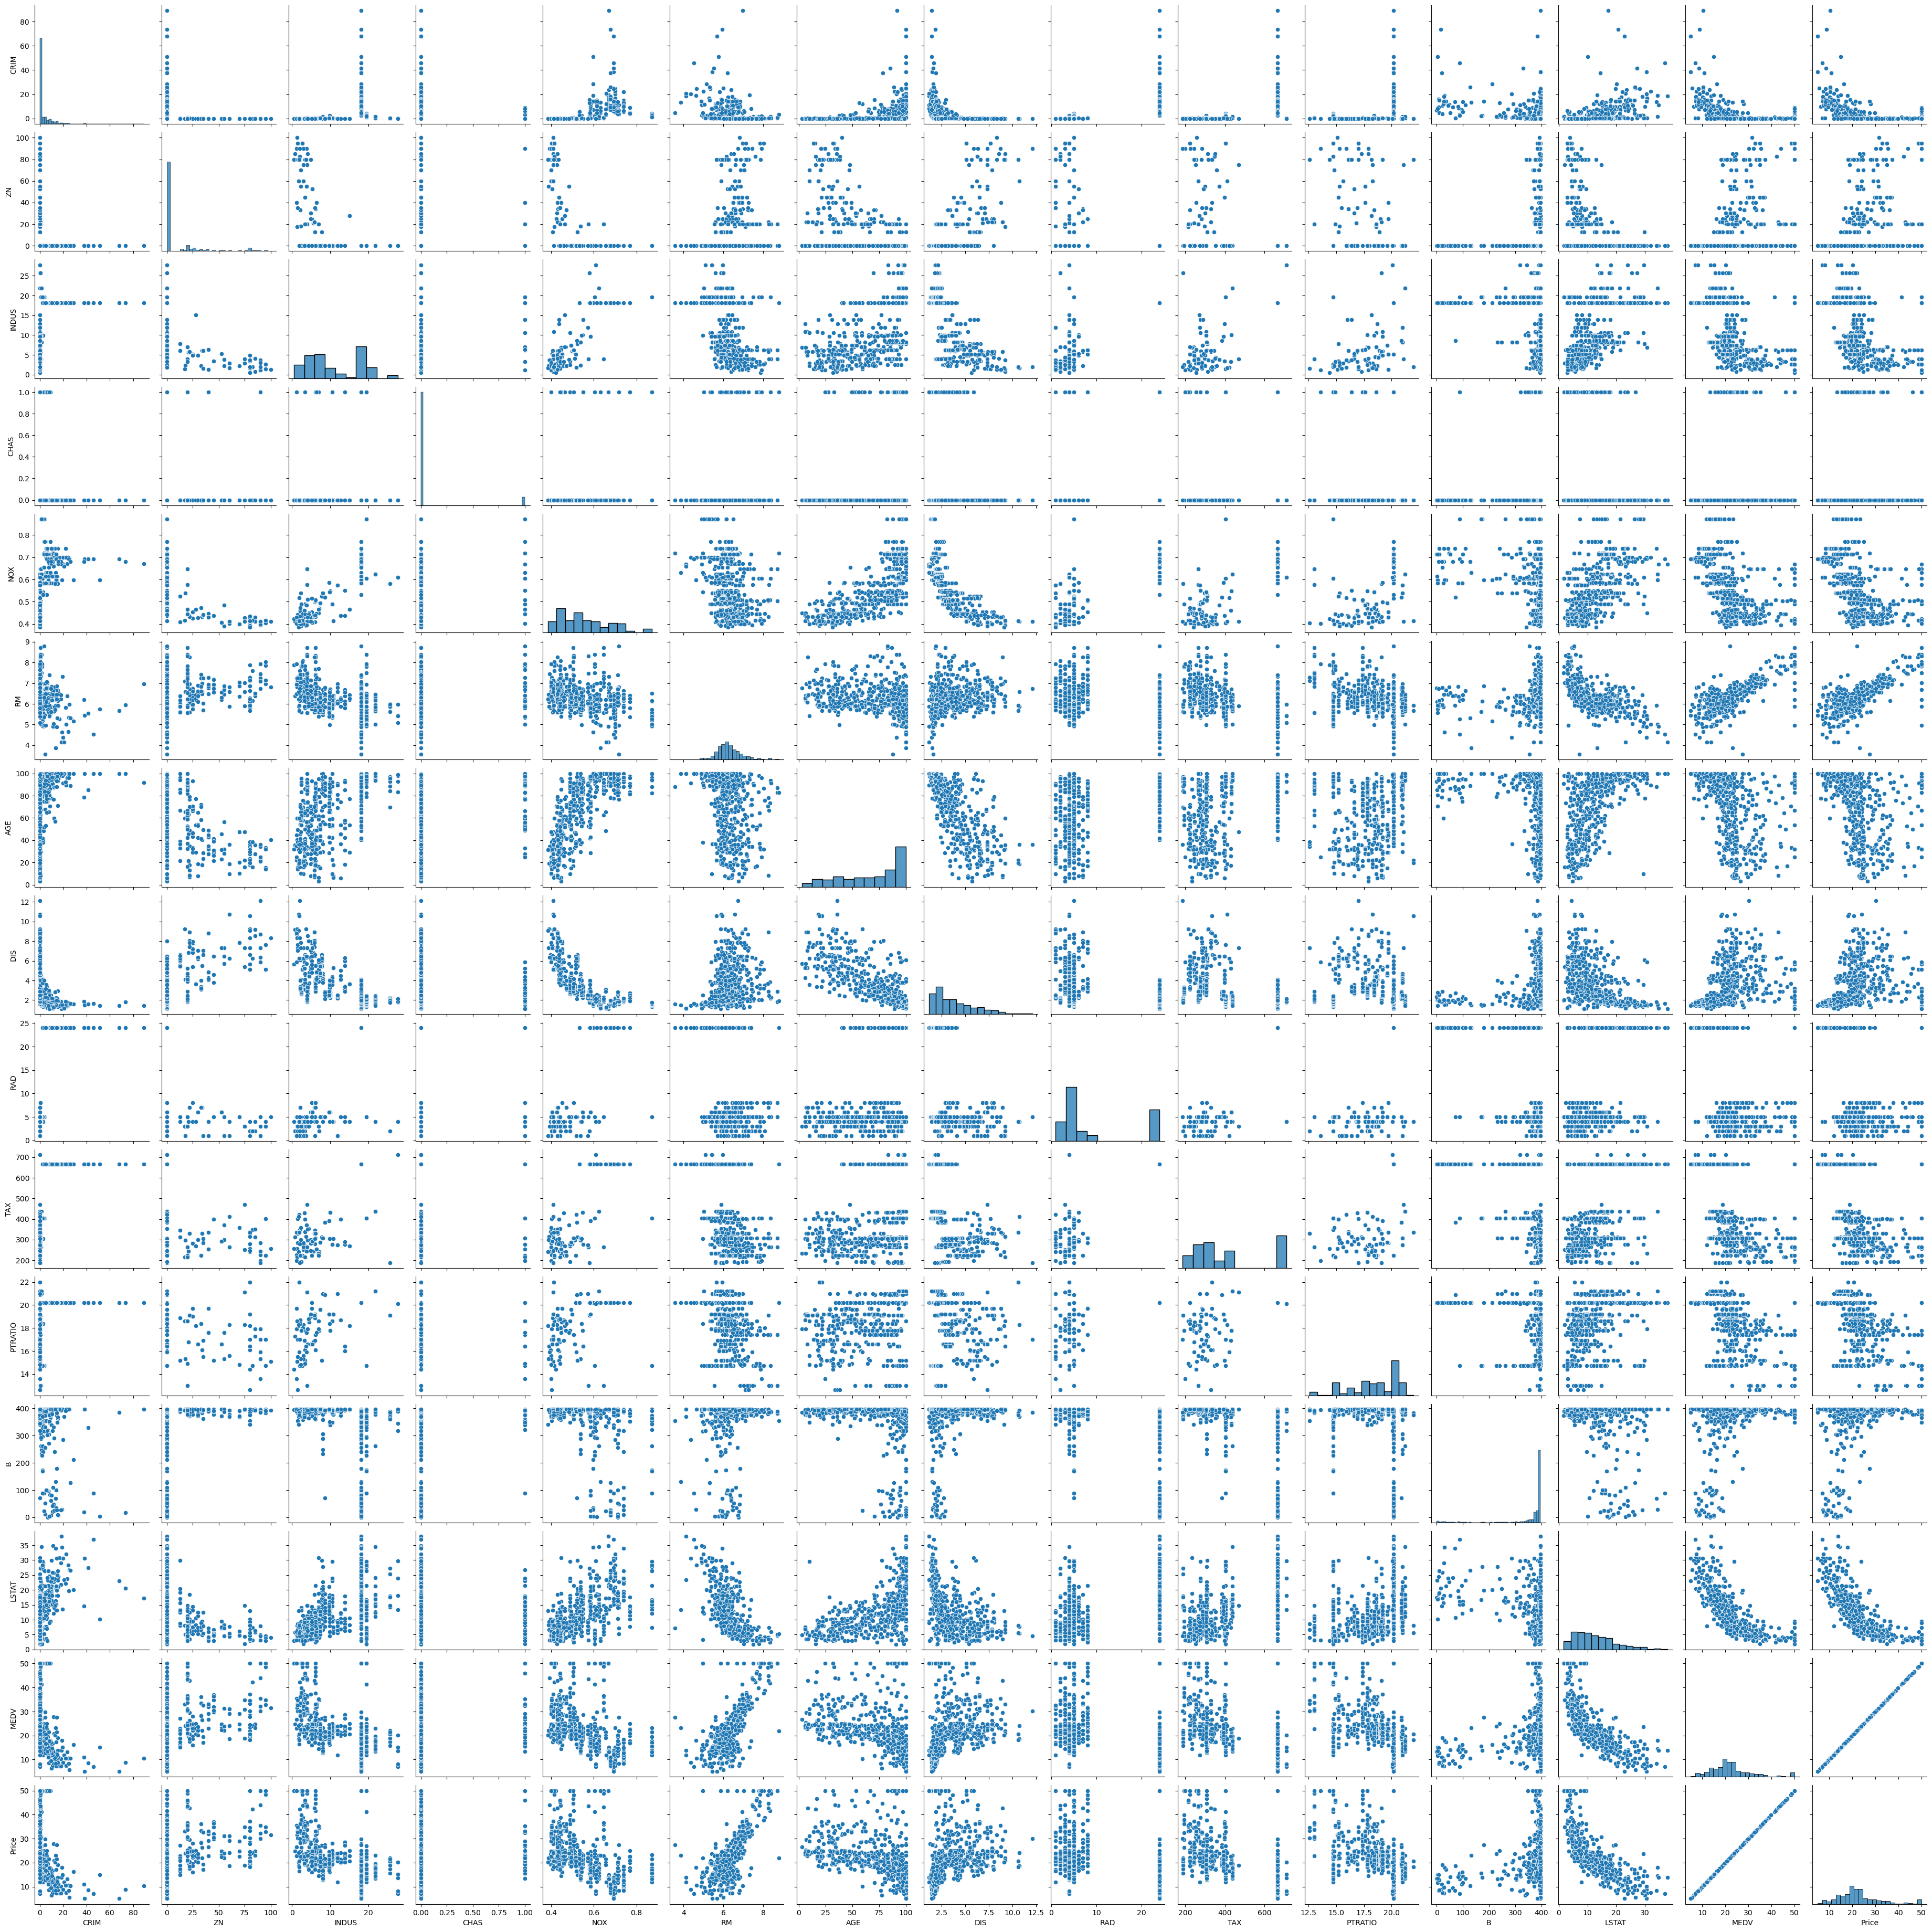

In [28]:
import seaborn as sns

sns.pairplot(dataset)

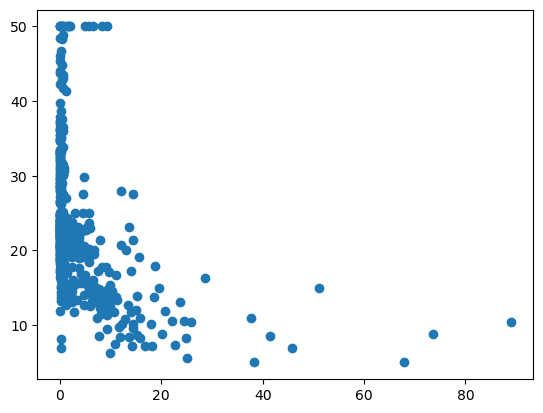

In [30]:
plt.scatter(dataset['CRIM'],dataset['Price'])  #(xlabel, ylabel)

<Axes: xlabel='RM', ylabel='Price'>

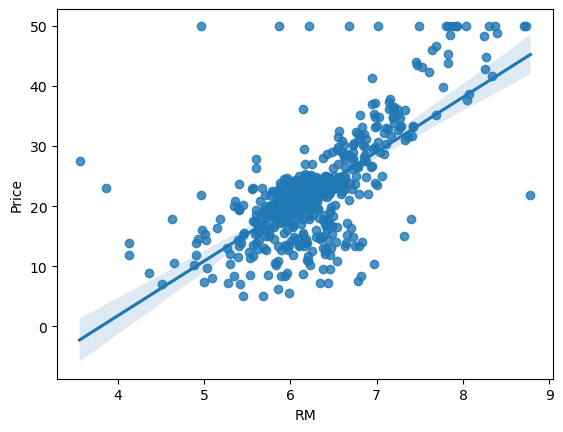

In [31]:
import seaborn as sns
sns.regplot(x='RM',y='Price',data=dataset)

<Axes: xlabel='LSTAT', ylabel='Price'>

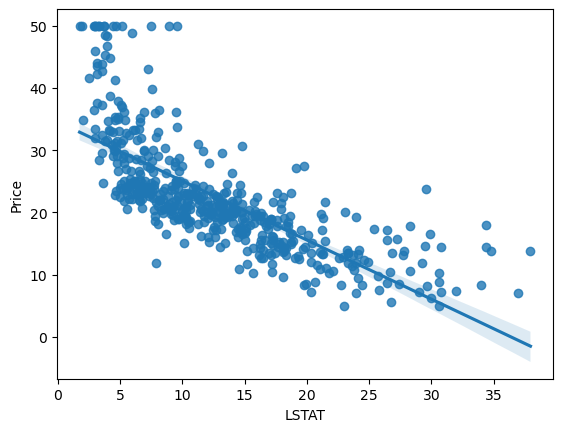

In [32]:
sns.regplot(x='LSTAT',y='Price',data=dataset)

<Axes: xlabel='CHAS', ylabel='Price'>

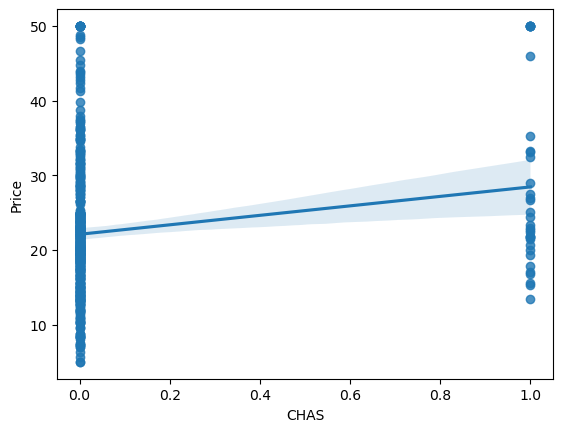

In [33]:
sns.regplot(x='CHAS',y='Price',data=dataset)

In [37]:
## INDEPENDENT AND DEPENDENT FEATURES

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

X.head()
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [38]:
### TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04,21.2
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21,19.3
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58,23.1
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,13.4


In [39]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52,17.1
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88,14.5
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22,14.3


In [40]:
### standardize the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train,X_test


(array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.39651419,
         -1.01531611,  0.60629225],
        [-0.40200818, -0.50512499, -0.16208345, ...,  0.3870674 ,
         -0.05366252, -0.19368088],
        [-0.39721053, -0.50512499, -0.60948856, ...,  0.42854113,
         -0.31132373, -0.39634074],
        ...,
        [-0.41604586,  3.03838247, -1.3166773 , ...,  0.35987906,
         -0.90549329,  0.1583073 ],
        [ 0.92611293, -0.50512499,  1.00549958, ..., -2.87841346,
          1.52750437, -1.02565293],
        [-0.39030549, -0.50512499, -0.37135358, ..., -3.32828832,
         -0.25218837, -0.4710049 ]], shape=(354, 14)),
 array([[-0.41814319, -0.45257245, -1.06299571, ...,  0.45712276,
         -0.5785895 ,  0.25394818],
        [-0.42197518,  1.15375592, -0.70943587, ...,  0.47107234,
         -1.34619278,  1.27339921],
        [-0.41662948, -0.45257245,  2.48608589, ...,  0.40341687,
          0.67938829, -0.9045189 ],
        ...,
        [-0.37095894, -0.45257245, -0

In [42]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)

### print the coefficients and the intercept
print(regression.coef_)
print(regression.intercept_)

[ 4.59286976e-15 -1.00212246e-14  1.28290406e-15  1.08935128e-15
  3.49296789e-15 -2.05644262e-14  2.03657341e-14 -1.95486386e-14
  1.71313943e-14  1.29748283e-14  7.52324308e-15 -7.17626877e-15
  7.40119341e-15  9.37531490e+00]
23.01581920903955


In [43]:
### on which parameter the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [44]:
### prediction with test data
reg_pred = regression.predict(X_test)

reg_pred

array([25.39666335, 34.95433778, 14.53566968, 24.52778385, 17.25091809,
       21.48670563, 19.09728702, 14.97010942, 21.05226588, 18.01118765,
       23.11585468, 20.29199632,  7.36741385, 22.79002487, 19.85755658,
       32.13047942, 20.18338639, 10.84293183, 54.06968664, 15.07871936,
       27.13442234, 31.37020987, 13.55818025, 24.09334411, 15.1873293 ,
       14.75288955, 21.81253544, 15.94759885, 23.33307455, 19.6403367 ,
       24.85361366, 25.61388322, 16.05620879, 22.35558512, 20.5092162 ,
       20.83504601, 37.45236632, 20.94365594, 26.26554284, 25.17944347,
       21.16087582, 30.39272044, 54.06968664, 18.66284727, 24.31056398,
       16.16481873, 13.99261999, 26.04832297, 21.37809569, 25.83110309,
       20.29199632, 38.21263588, 16.27342866, 28.54635151, 47.01004075,
       22.79002487, 19.74894664, 30.71855025, 25.72249316, 19.85755658,
       26.91720246, 38.21263588, 33.97684835, 21.7039255 , 25.93971303,
       21.48670563, 13.99261999, 26.69998259, 33.21657879, 13.55

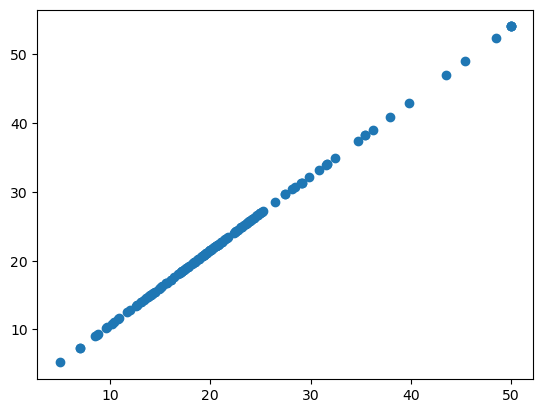

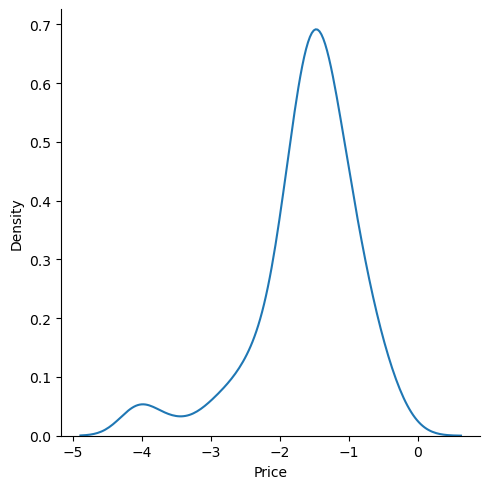

In [52]:
### plot a scatter plot for the prediction

plt.scatter(y_test,reg_pred) ## model has performed well (if linear)

### residual (error)

residual = y_test-reg_pred
residual
## plot residual

sns.displot(residual,kind='kde')

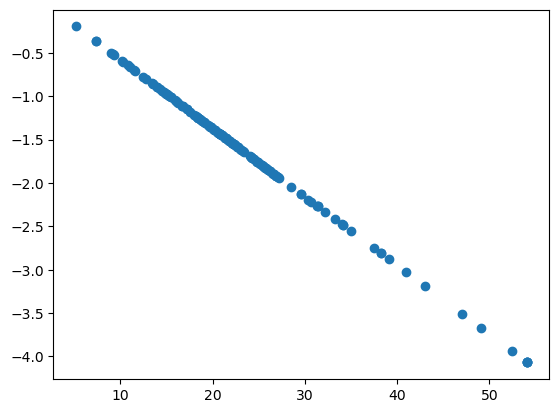

In [51]:
### scatter plot wrt to prediction and residual
plt.scatter(reg_pred,residual)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))

print(np.sqrt(mean_squared_error(y_test,reg_pred)))

1.6079244721974424
3.1377942129376986
1.7713820064959729


In [56]:
# R square and Adjusted R square

from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9578893590579689


0.953586081881411

In [57]:
import pickle 

pickle.dump(regression,open('regmodel.pkl','wb'))

In [58]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))